# 1.  Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import requests
import re
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
warnings.filterwarnings("ignore")

In [2]:
# Install tweepy library
#!conda install -c conda-forge tweepy

# 2. Gather Data

In [3]:
df = pd.read_csv('twitter-archive-enhanced-2.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# download file from url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url=url, auth=('user','pass'))

# save file locally
with open(url.split('/')[-1], 'wb') as output:
    output.write(response.content)

image_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.errors.Unauthorized as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [6]:
# file = open('tweet-json.txt', 'r')
tweet_list = []
with open('tweet-json.txt', 'r') as fp:
    file = fp.readlines()
for line in file:
    try:
        tweet_list.append(json.loads(line))
    except:
        continue

# file.close()
tweets_df = pd.DataFrame()
tweets_df['tweet_id'] = list(map(lambda tweet: tweet['id'], tweet_list))
tweets_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_list))
tweets_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_list))
tweets_df['created_at'] = list(map(lambda tweet: tweet['created_at'], tweet_list))
tweets_df['full_text'] = list(map(lambda tweet: tweet['full_text'], tweet_list))
tweets_df.head()

,tweet_id,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...


# 3. Assess Data

### 3.1 VIsual Assessment

<AxesSubplot:>

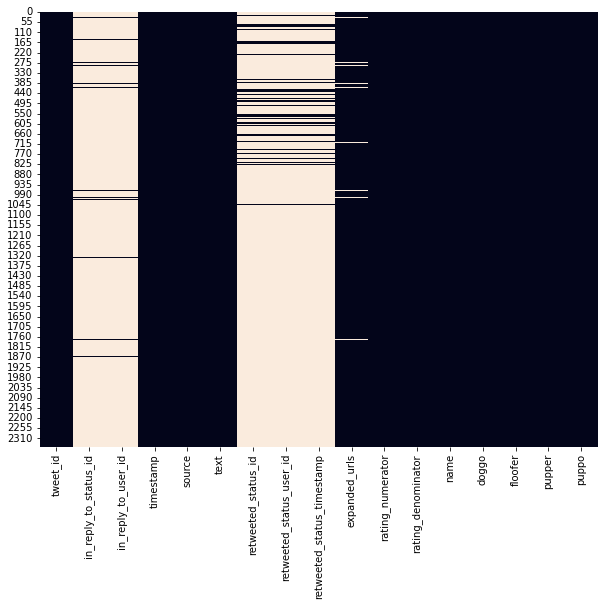

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:>

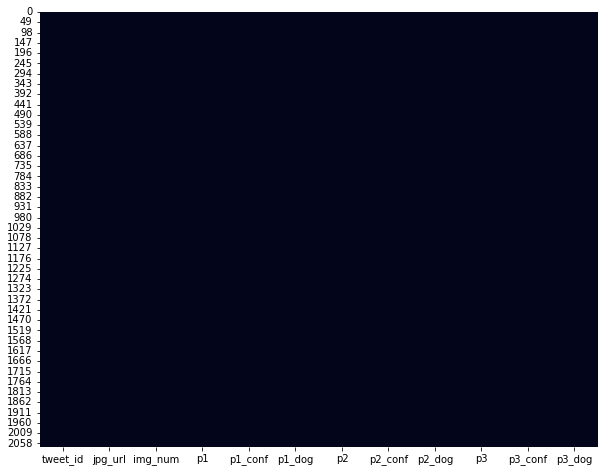

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(image_df.isnull(), cbar=False)

<AxesSubplot:>

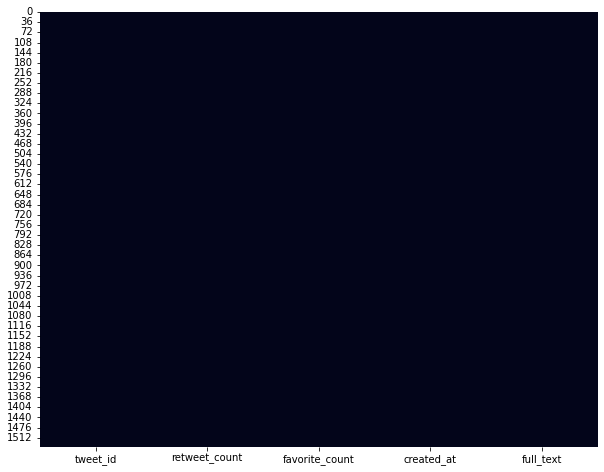

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(tweets_df.isnull(), cbar=False)

### 3.2 Programatic assesment

#### WeRateDogs Twitter archive Dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
df.shape

(2356, 17)

In [12]:
df.describe(include='object')

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/667152164...,None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


In [13]:
# Check for duplicates
df.duplicated().sum()

0

In [14]:
df.source.value_counts(normalize=True)*100

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     94.269949
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                         3.862479
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      1.400679
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>     0.466893
Name: source, dtype: float64

In [15]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [16]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [17]:
df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [18]:
df.floofer.value_counts(normalize=True)*100

None       99.575552
floofer     0.424448
Name: floofer, dtype: float64

In [19]:
df.doggo.value_counts(normalize=True)*100

None     95.882852
doggo     4.117148
Name: doggo, dtype: float64

In [20]:
df.pupper.value_counts(normalize=True)*100

None      89.091681
pupper    10.908319
Name: pupper, dtype: float64

In [21]:
df.puppo.value_counts(normalize=True)*100

None     98.726655
puppo     1.273345
Name: puppo, dtype: float64

#### Image Predictions Dataset

In [22]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_df.shape

(2075, 12)

In [24]:
image_df.describe(include='object')

,jpg_url,p1,p2,p3
count,2075,2075,2075,2075
unique,2009,378,405,408
top,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,golden_retriever,Labrador_retriever,Labrador_retriever
freq,2,150,104,79


In [25]:
image_df[image_df['jpg_url'] == 'https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
800,691416866452082688,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True
1624,803692223237865472,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True


In [26]:
# Check for duplicates
image_df.duplicated().sum()

0

In [27]:
image_df.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [28]:
image_df.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [29]:
image_df.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [30]:
image_df.p1_dog.value_counts(normalize=True)*100

True     73.831325
False    26.168675
Name: p1_dog, dtype: float64

In [31]:
image_df.p2_dog.value_counts(normalize=True)*100

True     74.843373
False    25.156627
Name: p2_dog, dtype: float64

In [32]:
image_df.p3_dog.value_counts(normalize=True)*100

True     72.240964
False    27.759036
Name: p3_dog, dtype: float64

In [33]:
image_df.img_num.value_counts(normalize=True)*100

1    85.783133
2     9.542169
3     3.180723
4     1.493976
Name: img_num, dtype: float64

#### Tweet API dataset

In [34]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        1545 non-null   int64 
 1   retweet_count   1545 non-null   int64 
 2   favorite_count  1545 non-null   int64 
 3   created_at      1545 non-null   object
 4   full_text       1545 non-null   object
dtypes: int64(3), object(2)
memory usage: 60.5+ KB


In [35]:
# Check shape of data
tweets_df.shape

(1545, 5)

In [36]:
tweets_df.tweet_id.duplicated().sum()

0

In [37]:
# Check for duplicates
tweets_df.duplicated().sum()

0

### 3.3. Issues list

- missing values

- incorrect data types

- duplicated values

- messy column values

- unnecessary features/columns

- add new features

- merge all dataframe

# 4. Cleaning

### 4.1.1 Data type issues:
#### WeRateDogs Twitter Dataset:

- timestamp,retweeted_status_timestamp column type should be date instead of object
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id data types should be int instead of float

#### Image Prediction Dataset:

- tweet_id should be string.

#### Tweet API dataset

- tweet_id: The current type is int64, I will convert it to string since there is no calculation required.

- created_at: The current type is object (str) rather than datetime. I will change it to datetime.


### 4.1.2 Missing value
#### WeRateDogs Twitter Dataset:

- Missing values expressed as "none". (name, duppo, flopper, etc.)

#### Image Prediction Dataset:

- Missed ID's exists in the dataset compare to df

#### Tweet API dataset

- contributors, coordinates, place and geo features should be excluded due to high missing ratio.

### 4.1.3 Messy data
#### WeRateDogs Twitter Dataset:
- source column includes html tags, these tags should be stripped.
- Names column should be cleaned, there is invalid records like a, the, an, the , very, unacceptable which is start with lowercase.

#### Image Prediction Dataset:

- p1, p2, p3 columns should be standardized as all lowercase and "-" expression should be removed.

### 4.1.4 Duplicated data
#### WeRateDogs Twitter Dataset:

- excluding any tweet that is a retweet
- We only want original ratings (no retweets) that have images






*Tidiness*

- joining all tables.
- adding new features like gender, etc.
- creating final dog prediction
- favorited, retweeted columns includes always false inputs, therefore it should be excluded.

### 4.1.1 Data type issues Clean

joining all tables

In [38]:
# Merge all 3 data together
full_df = pd.merge(df, image_df, how='inner', on=['tweet_id'])
full_df = pd.merge(full_df, tweets_df, how='inner', on=['tweet_id'])
full_df.to_csv('full_df.csv')
full_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...


In [39]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1304 non-null   int64  
 1   in_reply_to_status_id       13 non-null     float64
 2   in_reply_to_user_id         13 non-null     float64
 3   timestamp                   1304 non-null   object 
 4   source                      1304 non-null   object 
 5   text                        1304 non-null   object 
 6   retweeted_status_id         77 non-null     float64
 7   retweeted_status_user_id    77 non-null     float64
 8   retweeted_status_timestamp  77 non-null     object 
 9   expanded_urls               1304 non-null   object 
 10  rating_numerator            1304 non-null   int64  
 11  rating_denominator          1304 non-null   int64  
 12  name                        1304 non-null   object 
 13  doggo                       1304 

In [40]:
full_df.shape

(1304, 32)

*Code data types*

In [41]:
# Convert created_at to datetime

full_df['created_at'] = pd.to_datetime(full_df['created_at'])



In [42]:
# Convert the type of tweet_id to string

full_df['tweet_id'] = full_df['tweet_id'].astype('str')

In [43]:
full_df['timestamp'] = pd.to_datetime(full_df['timestamp'])

*Test data types correction*

In [44]:
type(full_df.created_at[0]), type(full_df.tweet_id[0]), type(full_df.timestamp[0])

(pandas._libs.tslibs.timestamps.Timestamp,
 str,
 pandas._libs.tslibs.timestamps.Timestamp)

In [45]:
# Define a list of the columns to be dropped

drop_col = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

full_df = full_df.drop(drop_col, axis=1)

In [46]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1304 non-null   object             
 1   timestamp           1304 non-null   datetime64[ns, UTC]
 2   source              1304 non-null   object             
 3   text                1304 non-null   object             
 4   expanded_urls       1304 non-null   object             
 5   rating_numerator    1304 non-null   int64              
 6   rating_denominator  1304 non-null   int64              
 7   name                1304 non-null   object             
 8   doggo               1304 non-null   object             
 9   floofer             1304 non-null   object             
 10  pupper              1304 non-null   object             
 11  puppo               1304 non-null   object             
 12  jpg_url             1304 non-null 

### 4.1.3 Messy Data Clean

*Code Source*

In [47]:
# Display the values in the source column

full_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1289
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                        8
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       7
Name: source, dtype: int64

In [48]:
# Create regex to extract the string between the tags: <a> </a>
full_df['source'] = full_df.source.str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', expand = True)[4];

In [49]:
# Change source to category

full_df['source'] = full_df['source'].astype('category')

*Test Source correction*

In [50]:
full_df.source.value_counts()

Twitter for iPhone    1289
Twitter Web Client       8
TweetDeck                7
Name: source, dtype: int64

*Code Names*

In [51]:
full_df.name.value_counts()

None       308
a           15
Lucy         9
Charlie      9
Oliver       9
          ... 
Halo         1
Moe          1
Mary         1
Brandi       1
Ricky        1
Name: name, Length: 668, dtype: int64

In [52]:
# set max_colwidth of cell pandas dataframe to show full dataframe
pd.set_option('display.max_colwidth', -1)


full_df[full_df['name'].str.islower()][['tweet_id','full_text','name']]

,tweet_id,full_text,name
21,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
50,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
141,859196978902773760,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
155,855459453768019968,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
293,828650029636317184,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
438,806219024703037440,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
524,792913359805018113,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
610,778396591732486144,RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,an
647,772581559778025472,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
662,770655142660169732,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,very


In [53]:
# To clean the name column, I will do the following:
#   - create 3 lists and assign tweet_ids to each list based on the following criteria:
#       - a list where the name starts with lower case and the `full_text` column converted to lowercase contains 'named'
#       - a list where the name starts with lower case and the `full_text` column converted to lowercase contains 'name is'
#       - a list where the `name` column converted to lowercase only
#   - loop through the data frame and asign the text to name
#   - index the dataframe and assign the value of the string to the `name` column

lowercase_named = full_df.loc[(full_df['name'].str.islower()) & (full_df['full_text'].str.contains('named'))]['tweet_id'].tolist()

lowercase_name_is = full_df.loc[(full_df['name'].str.islower()) & (full_df['full_text'].str.contains('name is'))]['tweet_id'].tolist()


lowercase = full_df.loc[(full_df['name'].str.islower())]['tweet_id'].tolist()


print(lowercase_name_is)
print('\n')
print(lowercase_named)
print('\n')
print(lowercase)
for twt in lowercase_name_is:
    text = full_df.full_text[full_df.tweet_id == twt].iloc[0]
    full_df.loc[full_df.tweet_id == twt,'name'] = re.findall("name is\s(\w+)", text)


for twt in lowercase_named:
    text = full_df.full_text[full_df.tweet_id == twt].iloc[0]
    full_df.loc[full_df.tweet_id == twt,'name'] = re.findall(r"named\s(\w+)", text)    


for twt in lowercase:
    text = full_df.full_text[full_df.tweet_id == twt].iloc[0]
    full_df.loc[full_df.tweet_id == twt,'name'] = "None"

['765395769549590528']


[]


['887517139158093824', '881536004380872706', '859196978902773760', '855459453768019968', '828650029636317184', '806219024703037440', '792913359805018113', '778396591732486144', '772581559778025472', '770655142660169732', '770093767776997377', '765395769549590528', '755206590534418437', '748977405889503236', '748692773788876800', '748575535303884801', '747885874273214464', '747816857231626240', '746872823977771008', '746369468511756288', '745422732645535745', '743222593470234624', '741067306818797568', '740214038584557568', '736225175608430592', '731156023742988288', '730924654643314689', '728035342121635841', '717537687239008257', '715733265223708672', '710272297844797440', '704859558691414016', '704054845121142784', '703079050210877440', '703041949650034688', '702539513671897089', '700864154249383937', '700747788515020802', '697259378236399616', '695095422348574720', '692187005137076224', '690360449368465409']


*Test Names correction*

In [54]:
full_df.name.value_counts()

None       350
Tucker     9  
Lucy       9  
Charlie    9  
Oliver     9  
          ..  
Mary       1  
Brandi     1  
Swagger    1  
Bauer      1  
Ricky      1  
Name: name, Length: 651, dtype: int64

*Code p1, p2, p3*

In [55]:
# View the columns before the change

full_df[['p1','p2','p3']].head(10)

,p1,p2,p3
0,orange,bagel,banana
1,Chihuahua,Pekinese,papillon
2,Chihuahua,malamute,kelpie
3,paper_towel,Labrador_retriever,spatula
4,basset,English_springer,German_short-haired_pointer
5,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant
6,Appenzeller,Border_collie,ice_lolly
7,Pomeranian,Eskimo_dog,Pembroke
8,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever
9,Pembroke,Cardigan,Chihuahua


In [56]:
# Replace _ with space

full_df['p3'] = full_df.p3.str.replace('_',' ')
full_df['p1'] = full_df.p1.str.replace('_',' ')
full_df['p2'] = full_df.p2.str.replace('_',' ')

# Capitalize the content (every word) using title

full_df['p2'] = full_df.p2.str.title()
full_df['p3'] = full_df.p3.str.title()
full_df['p1'] = full_df.p1.str.title()

*Test p1, p2, p3 correction*

In [57]:
col = ['p1', 'p2', 'p3']
full_df[col].head(10)

,p1,p2,p3
0,Orange,Bagel,Banana
1,Chihuahua,Pekinese,Papillon
2,Chihuahua,Malamute,Kelpie
3,Paper Towel,Labrador Retriever,Spatula
4,Basset,English Springer,German Short-Haired Pointer
5,Chesapeake Bay Retriever,Irish Terrier,Indian Elephant
6,Appenzeller,Border Collie,Ice Lolly
7,Pomeranian,Eskimo Dog,Pembroke
8,Irish Terrier,Irish Setter,Chesapeake Bay Retriever
9,Pembroke,Cardigan,Chihuahua


### 4.2.2 CLEAN ISSUE #2

### 4.2.3 TEST CLEANED ISSUE #2

In [58]:
full_df['timestamp'].dt.time

0       16:23:56
1       00:17:27
2       00:18:03
3       15:58:51
4       16:00:24
          ...   
1299    00:03:21
1300    21:18:22
1301    18:39:13
1302    03:32:10
1303    03:10:43
Name: timestamp, Length: 1304, dtype: object

In [59]:
full_df = full_df.drop([ 'timestamp', 'text'], axis=1)

In [60]:
full_df.expanded_urls.head(5)

0    https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                
1    https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                
2    https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                
3    https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                
4    https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
Name: expanded_urls, dtype: object

# 5. Store the cleaned dataset

In [61]:
full_df.columns

Index(['tweet_id', 'source', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count',
       'created_at', 'full_text'],
      dtype='object')

In [62]:
# Create a list to re-sort the dataframe columns
sort_cols = ['tweet_id','full_text','name','created_at','retweet_count', 'favorite_count',
 'source','rating_numerator', 'rating_denominator', 'img_num', 'p1', 'p1_conf', 'p1_dog',
 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog','expanded_urls', 'jpg_url']

full_df = full_df[sort_cols]

In [63]:
full_df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')


# 6. Analyze the Cleaned dataset

In [64]:
new_df = pd.read_csv('./twitter_archive_master.csv')
new_df.head()

,tweet_id,full_text,name,created_at,retweet_count,favorite_count,source,rating_numerator,rating_denominator,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,expanded_urls,jpg_url
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,2017-08-01 16:23:56+00:00,8853,39467,Twitter for iPhone,13,10,1,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,2017-08-01 00:17:27+00:00,6514,33819,Twitter for iPhone,13,10,1,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,2017-07-31 00:18:03+00:00,4328,25461,Twitter for iPhone,12,10,1,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,2017-07-30 15:58:51+00:00,8964,42908,Twitter for iPhone,13,10,1,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,2017-07-29 16:00:24+00:00,9774,41048,Twitter for iPhone,12,10,2,...,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


In [65]:
new_df.sample(5)

,tweet_id,full_text,name,created_at,retweet_count,favorite_count,source,rating_numerator,rating_denominator,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,expanded_urls,jpg_url
1105,706310011488698368,Here's a very sleepy pupper. Thinks it's an airplane. 12/10 would snug for eternity https://t.co/GGmcTIkBbf,None,2016-03-06 02:46:44+00:00,9034,23443,Twitter for iPhone,12,10,1,...,0.698165,True,Chihuahua,0.105834,True,Bloodhound,0.062030,True,"https://twitter.com/dog_rates/status/706310011488698368/photo/1,https://twitter.com/dog_rates/status/706310011488698368/photo/1",https://pbs.twimg.com/media/Cc1RNHLW4AACG6H.jpg
1254,692901601640583168,"""Fuck the system"" 10/10 https://t.co/N0OADmCnVV",None,2016-01-29 02:46:29+00:00,682,1971,Twitter for iPhone,10,10,1,...,0.403496,True,Cocker Spaniel,0.135164,True,Golden Retriever,0.088719,True,https://twitter.com/dog_rates/status/692901601640583168/photo/1,https://pbs.twimg.com/media/CZ2uU37UcAANzmK.jpg
180,849412302885593088,This is Noosh. He noticed you were in the shower and thought you could use some company. 12/10 h*ckin loyal https://t.co/Uq3ChFgWA3,Noosh,2017-04-05 00:04:08+00:00,3487,17039,Twitter for iPhone,12,10,4,...,0.907559,True,Crossword Puzzle,0.017934,False,Chihuahua,0.016191,True,"https://twitter.com/dog_rates/status/849412302885593088/photo/1,https://twitter.com/dog_rates/status/849412302885593088/photo/1,https://twitter.com/dog_rates/status/849412302885593088/photo/1,https://twitter.com/dog_rates/status/849412302885593088/photo/1",https://pbs.twimg.com/media/C8m3-iQVoAAETnF.jpg
500,795400264262053889,This is Brody. He's trying to make the same face as the football. 12/10 https://t.co/2H4MfOGlpQ,Brody,2016-11-06 22:59:35+00:00,3323,11270,Twitter for iPhone,12,10,2,...,0.925494,True,Labrador Retriever,0.059241,True,Tennis Ball,0.004495,False,"https://twitter.com/dog_rates/status/795400264262053889/photo/1,https://twitter.com/dog_rates/status/795400264262053889/photo/1,https://twitter.com/dog_rates/status/795400264262053889/photo/1,https://twitter.com/dog_rates/status/795400264262053889/photo/1",https://pbs.twimg.com/media/CwnUUGTWIAE8sFR.jpg
461,801538201127157760,This is Wallace. He'll be your chau-fur this evening. 12/10 eyes on the road Wallace https://t.co/p1RD39XjUe,Wallace,2016-11-23 21:29:33+00:00,2391,9141,Twitter for iPhone,12,10,1,...,0.550506,True,Cardigan,0.306612,True,Shetland Sheepdog,0.054230,True,https://twitter.com/dog_rates/status/801538201127157760/photo/1,https://pbs.twimg.com/media/Cx-itFWWIAAZu7l.jpg


In [66]:
new_df.tail(5)

,tweet_id,full_text,name,created_at,retweet_count,favorite_count,source,rating_numerator,rating_denominator,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,expanded_urls,jpg_url
1299,689599056876867584,Here we see 33 dogs posing for a picture. All get 11/10 for superb cooperation https://t.co/TRAri5iHzd,None,2016-01-20 00:03:21+00:00,6265,12795,Twitter for iPhone,11,10,1,...,0.426494,False,Cocker Spaniel,0.073101,True,Chihuahua,0.070323,True,https://twitter.com/dog_rates/status/689599056876867584/photo/1,https://pbs.twimg.com/media/CZHyrvOXEAEin-A.jpg
1300,689557536375177216,Downright majestic af 12/10 https://t.co/WFh2FEbYzj,None,2016-01-19 21:18:22+00:00,519,2257,Twitter for iPhone,12,10,1,...,0.169482,True,Siberian Husky,0.161655,True,Dingo,0.154414,False,https://twitter.com/dog_rates/status/689557536375177216/photo/1,https://pbs.twimg.com/media/CZHM60BWIAA4AY4.jpg
1301,689517482558820352,This is Carl. He just wants to make sure you're having a good day. 12/10 just a swell pup https://t.co/Wk3XCnmDvm,Carl,2016-01-19 18:39:13+00:00,1609,3735,Twitter for iPhone,12,10,1,...,0.799319,True,Cardigan,0.189537,True,Papillon,0.003386,True,"https://twitter.com/dog_rates/status/689517482558820352/photo/1,https://twitter.com/dog_rates/status/689517482558820352/photo/1,https://twitter.com/dog_rates/status/689517482558820352/photo/1",https://pbs.twimg.com/media/CZGofjJW0AINjN9.jpg
1302,689289219123089408,Someone sent me this without any context and every aspect of it is spectacular. 13/10 please enjoy https://t.co/Rxrd4hPmp4,None,2016-01-19 03:32:10+00:00,1056,2476,Twitter for iPhone,13,10,1,...,0.254642,False,Assault Rifle,0.129558,False,Rifle,0.110875,False,https://twitter.com/dog_rates/status/689289219123089408/video/1,https://pbs.twimg.com/ext_tw_video_thumb/689289176076959744/pu/img/hEFkFtmMu_hkTlxK.jpg
1303,689283819090870273,Say hello to Chipson. He's aerodynamic af. No eyes (devastating). 9/10 would make sure he didn't bump into stuff https://t.co/V62rIva61J,Chipson,2016-01-19 03:10:43+00:00,1250,3624,Twitter for iPhone,9,10,1,...,0.267979,True,Affenpinscher,0.199619,True,Cairn,0.127469,True,https://twitter.com/dog_rates/status/689283819090870273/photo/1,https://pbs.twimg.com/media/CZDT-mZWsAEK9BH.jpg


In [67]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,1304.0,7.760259e+17,5.883089e+16,6.892838e+17,7.200302e+17,7.721090e+17,8.233873e+17,8.924206e+17
retweet_count,1304.0,4.052376e+03,5.794483e+03,2.300000e+01,1.243500e+03,2.389000e+03,4.498000e+03,7.951500e+04
favorite_count,1304.0,1.200352e+04,1.356446e+04,0.000000e+00,3.601250e+03,7.618000e+03,1.610200e+04,1.328100e+05
rating_numerator,1304.0,1.329601e+01,4.957119e+01,0.000000e+00,1.075000e+01,1.200000e+01,1.200000e+01,1.776000e+03
rating_denominator,1304.0,1.051227e+01,7.093705e+00,7.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.700000e+02
img_num,1304.0,1.289877e+00,6.593250e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
p1_conf,1304.0,6.101003e-01,2.656506e-01,5.903260e-02,3.788290e-01,6.107310e-01,8.566397e-01,9.999840e-01
p2_conf,1304.0,1.356792e-01,1.010279e-01,1.002880e-05,5.271005e-02,1.196160e-01,1.975993e-01,4.880140e-01
p3_conf,1304.0,5.915989e-02,5.052946e-02,5.595040e-07,1.552053e-02,4.770370e-02,9.179955e-02,2.734190e-01


In [68]:
new_df.describe(include=object).T

,count,unique,top,freq
full_text,1304,1304,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,1
name,1304,651,None,350
created_at,1304,1304,2017-08-01 16:23:56+00:00,1
source,1304,3,Twitter for iPhone,1289
p1,1304,270,Golden Retriever,120
p2,1304,280,Labrador Retriever,87
p3,1304,298,Labrador Retriever,59
expanded_urls,1304,1304,https://twitter.com/dog_rates/status/892420643555336193/photo/1,1
jpg_url,1304,1251,https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg,2


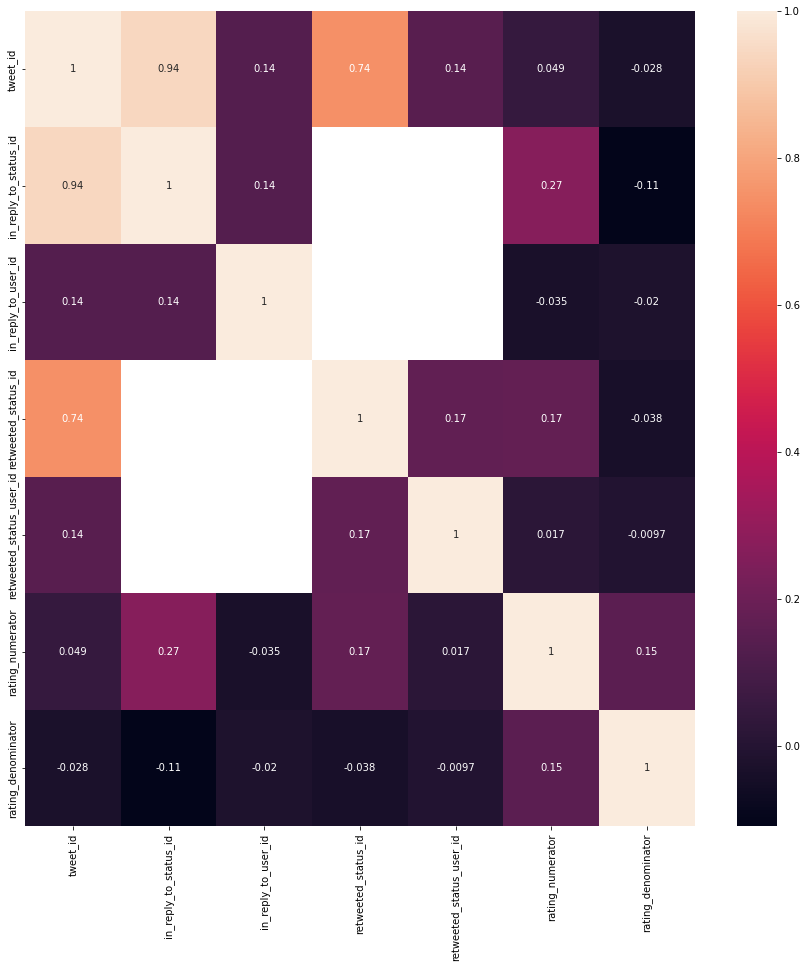

In [69]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True, ax=ax);

# <p style="text-align: center;">The End!</p>